In [2]:
import numpy as np 
import pandas as pd 

In [7]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# dọn dẹp, làm sạch dữ liệu
#xóa cột
df_can.drop(['AREA','REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
#sửa tên
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName': 'Region'}, inplace=True)
#thống nhất cột str 
df_can.columns = list(map(str, df_can.columns))
#đặt index 
df_can.set_index('Country', inplace=True)
#Thêm cột tổng
years = list(map(str, range(1980, 2014)))
df_can['Total'] = df_can[years].sum(axis=1)

In [8]:
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 

C:\Users\Admin\AppData\Local\Temp\ipykernel_17816\2998968204.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis=0).sum()


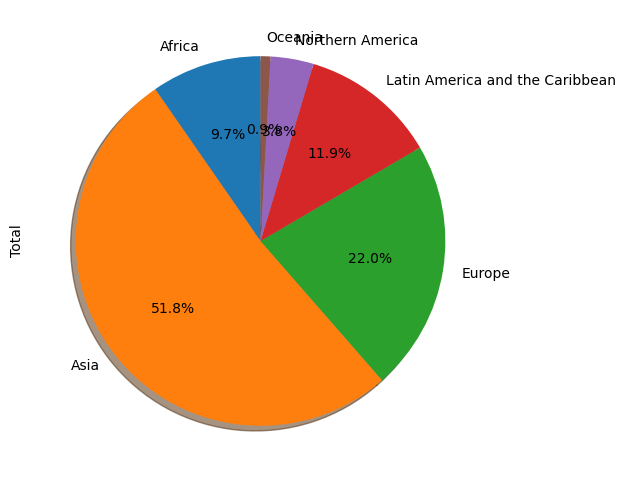

In [14]:
# nhóm các quốc gia theo lục địa, sử dụng hàm sum
# khi groupby phải luôn có 1 hàm aggregate đi kèm (sum, count, mean, apply...)
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.head()
# Draw
df_continents['Total'].plot(kind='pie', 
                            figsize=(6,6), 
                            autopct='%1.1f%%' # format hiển thị dữ liệu trong hình tròn
                            ,startangle=90 # quay hình tròn 
                            , shadow=True 
                            )
plt.show()

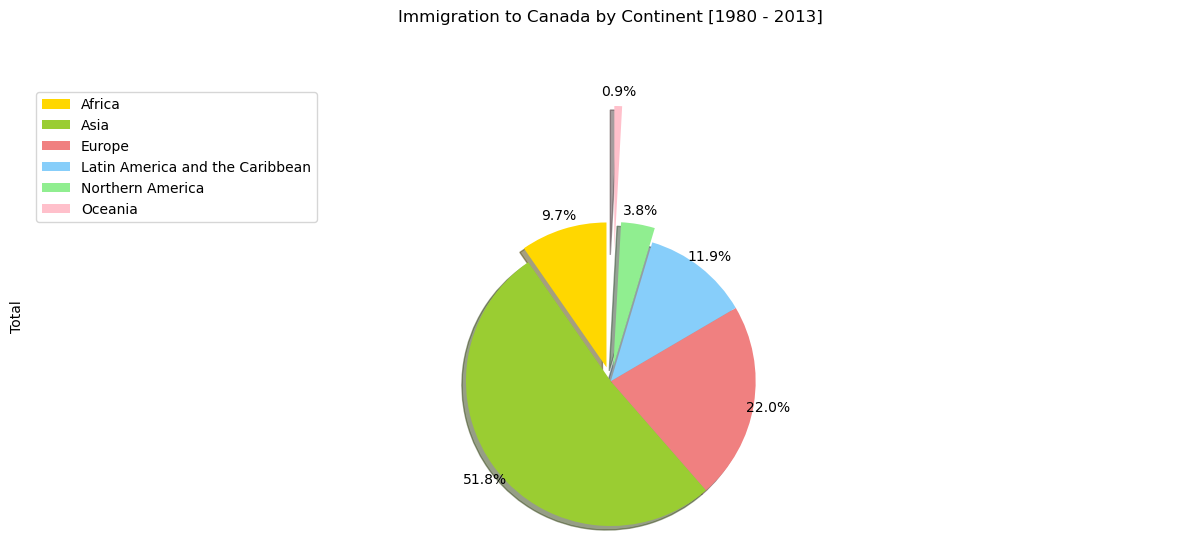

In [32]:
# style lại
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen','pink']
# Tỉ lệ cho mỗi lục địa để bù đắp mỗi wedge(1 lát cắt trong hình tròn)
# có 6 lát cắt, cho 3 lát cắt thấp nhất lồi ra ngoài
explode_list = [0.1,0, 0, 0, 0.1, 0.9]
df_continents['Total'].plot(kind='pie', shadow=True, figsize=(15,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            labels=None, 
                            pctdistance=1.1, # khoảng cách chú thích với tâm vòng tròn 
                            colors=colors_list,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
#hiển thị đúng hình tròn 
plt.axis('equal')

#Hiển thị bảng chú thích 
#loc: location, trên cùng bên trái
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()